<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Bryan Alfredo Solórzano Montero <br>

Fecha: 13/08/2022

# Importación de librerias necesarias

In [2]:
'''Se importa la libreria os'''
import os
'''Se importa la libreria cv2'''
import cv2
'''Se importa la libreria numpy'''
import numpy as np
'''Se importa la libreria PIL'''
from PIL import Image
'''Se importa la libreria pylot'''
import matplotlib.pyplot as plt
'''Se importa la libreria model_selection'''
from sklearn.model_selection import train_test_split
'''Se establece el nivel de codificación'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
'''Se importa la libreria tf utils''' 
from tensorflow.keras.utils import to_categorical
'''Se importa la libreria tf'''
from tensorflow.keras import layers, models
'''Se importa la libreria tf'''
import tensorflow as tf
'''Se importa la libreria metrics'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
'''Se importa la libreria tf keras'''
from tensorflow import keras
'''Se importa la libreria keras.models'''
from keras.models import Sequential
'''Se importa la libreria kesa.layers'''
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
'''Se importa la libreria tf.keras.layers'''
from tensorflow.keras.layers import BatchNormalization
'''Se importa la libreria tf.keras.callbacks'''
from tensorflow.python.keras.callbacks import EarlyStopping

## Cargar y exploración del Dataset

In [55]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/ProyectoU3/')

In [77]:
'''Se genera una variable con un número para que actúe como aleatorio'''
semilla_aleatoria = 49
'''Se establece la ruta de las imágenes'''
ruta_imagenes = "./Estudiantes_datos_fondoEliminadoNLM"
'''Se muestra los directorios (clases) del dataset'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordenan en orden alfabético (AZ - az)'''
nombre_clases.sort()
'''Se muestran las clases del dataset'''
print('Las clases del dataset son: \n' + str(nombre_clases))

Las clases del dataset son: 
['Anthony Goyes', 'Ariel Chabla', 'Bryan Solorzano', 'Davila Raymond', 'Fernando Masache', 'Genesis Heredia', 'Hector Cedenio', 'Jhon Zambrano', 'Joan Cevallos', 'Johana Salazar', 'Jordan Espinosa', 'Jorge Borrero', 'Jose Ruiz', 'Kevin Paute', 'Leonardo Borja', 'LucioCarlos', 'Lucy Mosquera', 'Luis Olalla', 'Maria Jose Parraga', 'Melany Lopez', 'Mercy Arrobo', 'Nataly Acosta', 'Selena Enriquez', 'Selena Rivas', 'Solano Wilmer', 'Steven Barragan']


In [78]:
def cargar_imagenes_etiquetas(clases):
    """Permite registrar las imagenes y categorías en un arreglo, aplicando transformaciones de color con opencv.

    Argumentos:
        clases (List): Una lista o arreglo de cadenas de texto que identifican a las clases del problema.

    Returna:
        Dos arreglos, uno para contener a las imagenes y otro para sus etiquetas
    """
    '''Arreglo vacío que almacenará las fotos'''
    imagenes = []
    '''Arreglo vacío que almacenará las etiquetas'''
    etiquetas = []
    '''Se crea un bloque que recorrerá cada clase'''
    for iterador, clase in enumerate(clases):
        '''Se crea un bloque que recorrerá cada elemento por clase'''
        for image_name in os.listdir(ruta_imagenes+"/"+clase):
            '''Se almacena la imagen leída mediante opencv'''
            imagen = cv2.imread(ruta_imagenes+"/"+clase+"/"+image_name)
            '''Se establece el formato de color en RGB'''
            imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
            img_array = Image.fromarray(imagen, 'L')
            '''Se añade a la lista de imágenes la imagen'''
            imagenes.append(np.array(imagen))
            '''Se añade el número del ciclo como mecanismo de label-encoder para las etiquetas'''
            etiquetas.append(iterador)
    return imagenes, etiquetas

'''Se llama la función creada y se almacenan los resultados en dos variables (para fotos y etiquetas)'''
imagenes, etiquetas = cargar_imagenes_etiquetas(nombre_clases)
'''Se imprime el número de imagenes cargadas'''
print("No. de imagenes y categorías cargadas = ",len(imagenes),"\nNo. de etiquetas cargadas = ",len(etiquetas))
print(type(imagenes),type(etiquetas))

No. de imagenes y categorías cargadas =  2445 
No. de etiquetas cargadas =  2445
<class 'list'> <class 'list'>


In [80]:
'''Se convierte la lista en un arreglo de imágenes'''
imagenes = np.array(imagenes)
'''Se convierte la lista en un arreglo de etiquetas'''
etiquetas = np.array(etiquetas)

imagenes = np.expand_dims(imagenes, axis=-1)

'''Se imprime las dimensiones de la imagen y etiquetas'''
print("Dimensión de la imagen = ",imagenes.shape,"\nDimensión de la etiqueta = ",etiquetas.shape)
print(type(imagenes),type(etiquetas))

Dimensión de la imagen =  (2445, 100, 100, 1) 
Dimensión de la etiqueta =  (2445,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


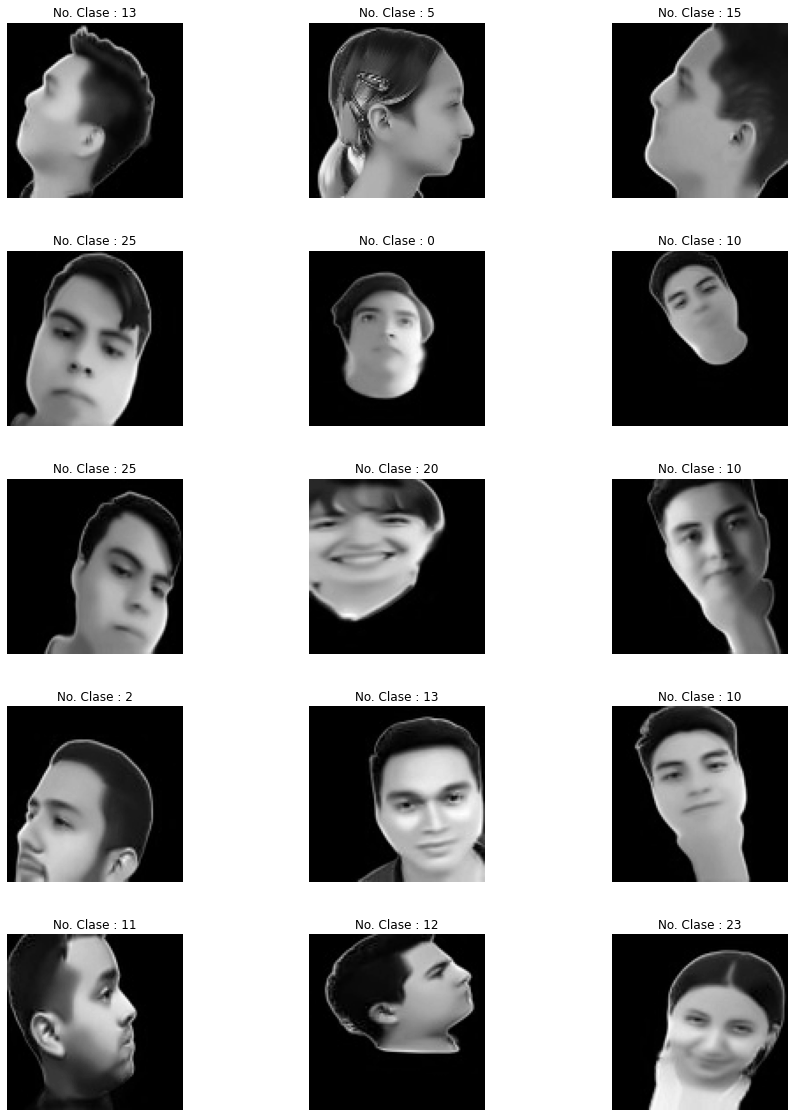

In [81]:
def mostrar_imagenes_aleatorias(imagenes, etiquetas):
    """Permite imprimir randómicamente una imagen por cada clase con título y sus dimensiones.

    Argumentos:
        ruta_imagenes (str): Una cadena de texto que identifica el.

    Returna:
        No retorna nada
    """
    '''Se establece las dimensiones de contendor del gráfico'''  
    plt.figure(1 , figsize = (15 , 20))
    '''Se establece una variable contador'''
    n = 0 
    '''Se genera un ciclo que iterará cada imagen'''
    for iterador in range(15):
        '''Se aumentan en una uniadad del contador'''
        n += 1 
        '''Se genera un número aleatorio'''
        numero_aleatario = np.random.randint(0 , imagenes.shape , 1)
        '''Se establece la distribución del contenedor gráfico'''
        plt.subplot(5 , 3 , n)
        '''Se ajusta la separación de altura y anchura'''
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        '''Se muestra una imagen de forma aletoria'''
        plt.imshow(imagenes[numero_aleatario[0]], cmap='gray')
        '''Se genera el título de cada imagen'''
        plt.title('No. Clase : {}'.format(etiquetas[numero_aleatario[0]]))
        '''Se deshabilita la visualización de los ejes'''
        plt.axis('off')
    '''Se muestra el contenedor gráfico'''
    plt.show()
'''Se llama al método generado anteriormente'''
mostrar_imagenes_aleatorias(imagenes, etiquetas)

## Preparando la data para la generación del modelo CNN

In [82]:
'''Se modifica el tipo de dato para imágenes y etiquetas'''
imagenes = imagenes.astype(np.float32)
etiquetas = etiquetas.astype(np.int32)
imagenes =  (imagenes- 128)/128
print("Dimensión de las imágenes después de normalizar= ",imagenes.shape)
print("Dimensión de las etiquetas= ",etiquetas.shape)

Dimensión de las imágenes después de normalizar=  (2445, 100, 100, 1)
Dimensión de las etiquetas=  (2445,)


In [83]:
'''Barajando los datos'''
'''Primer paso'''
numero_aleatorio = np.arange(imagenes.shape[0])
print("Valores antes de barajear = ",numero_aleatorio)

'''Barajando todos los valores igualmente espaciados en la lista almacenada aleatoriamente'''
np.random.seed(semilla_aleatoria)
np.random.shuffle(numero_aleatorio)
print("\nValores después de barajear = ",numero_aleatorio)

Valores antes de barajear =  [   0    1    2 ... 2442 2443 2444]

Valores después de barajear =  [   4 1581 1474 ...  424 1709  426]


In [84]:
'''Segundo paso'''
'''Barajendo las imágenes y los datos de las etiquetas correspondientes en las dos listas'''
imagenes = imagenes[numero_aleatorio]
etiquetas = etiquetas[numero_aleatorio]

print("Dimensiones de la imagen después de barajear = ",imagenes.shape,"\nDimensiones de " +
    "las etiquetas después de barajear = ",etiquetas.shape)

Dimensiones de la imagen después de barajear =  (2445, 100, 100, 1) 
Dimensiones de las etiquetas después de barajear =  (2445,)


## Se divide el dataset en entrenamiento y prueba

In [86]:
'''Se divide el dataset en entrenamiento y prueba (30%)'''
train_fotos, test_fotos, train_etiquetas, test_etiquetas = train_test_split(imagenes, etiquetas,
                                                                 test_size = 0.3, random_state = semilla_aleatoria)

In [87]:
'''Se imprime las dimensiones para cada división realizada'''
print("Dimensión train_fotos = ",train_fotos.shape)
print("Dimensión train_etiquetas= ",train_etiquetas.shape)
print("\nDimensión test_fotos = ",test_fotos.shape)
print("Dimensión test_etiquetas = ",test_etiquetas.shape)

Dimensión train_fotos =  (1711, 100, 100, 1)
Dimensión train_etiquetas=  (1711,)

Dimensión test_fotos =  (734, 100, 100, 1)
Dimensión test_etiquetas =  (734,)


# Arquitectura de AlexNet

## Cuarto experimento

In [110]:
#Código que responde a la descripción anterior
#Instanciamos el modelo
modelo=Sequential()
modelo.add(Conv2D(filters=96,kernel_size=(10,10),strides=(4,4),padding="valid",activation="relu",input_shape=(100,100,1)))
# Primera capa max pool 
modelo.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
modelo.add(BatchNormalization())
#2 Segunda capa convolucional
modelo.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 Segunda  capa max pool 
modelo.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
modelo.add(BatchNormalization())
# Tercera capa convolucional
modelo.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Normalizacion batch
modelo.add(BatchNormalization())
#Redimensionar el modelo AlexNet
modelo.add(Flatten())
#Primera capa de densidad
modelo.add(Dense(4096,input_shape=(100,100,1),activation="relu"))
#regularizar neuronas
modelo.add(Dropout(0.4))
#normalizacion por lote
modelo.add(BatchNormalization())
#Segunda capa de densidad
modelo.add(Dense(4096,activation="relu"))
#Regularizar neuronas
modelo.add(Dropout(0.4))
#normalizacion por lotes
modelo.add(BatchNormalization())
#Tercera capa de densidad
modelo.add(Dense(1000,activation="relu"))
#regularizar neuronas
modelo.add(Dropout(0.4))
#normalizacion por lote
modelo.add(BatchNormalization())
#capa de salida
modelo.add(Dense(len(nombre_clases),activation="softmax"))
#resumen
modelo.summary()

In [89]:
'''Se compila el modelo'''
modelo.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [90]:
'''Se entra al modelo'''
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=5, restore_best_weights=True)
history = modelo.fit(train_fotos, train_etiquetas, validation_data=(test_fotos, test_etiquetas),
           batch_size=32, epochs=30, callbacks=[early_stopping])

Epoch 1/30
54/54 [==============================] - 34s 440ms/step - loss: 3.5212 - accuracy: 0.1444 - val_loss: 5.1491 - val_accuracy: 0.0586
Epoch 2/30
54/54 [==============================] - 23s 420ms/step - loss: 2.7088 - accuracy: 0.2390 - val_loss: 4.4253 - val_accuracy: 0.0804
Epoch 3/30
54/54 [==============================] - 22s 416ms/step - loss: 2.4515 - accuracy: 0.2700 - val_loss: 4.6496 - val_accuracy: 0.0531
Epoch 4/30
54/54 [==============================] - 23s 423ms/step - loss: 2.0952 - accuracy: 0.3840 - val_loss: 5.2263 - val_accuracy: 0.0777
Epoch 5/30
54/54 [==============================] - 23s 423ms/step - loss: 1.7356 - accuracy: 0.4775 - val_loss: 5.1082 - val_accuracy: 0.0967
Epoch 6/30
54/54 [==============================] - 24s 454ms/step - loss: 1.5435 - accuracy: 0.5272 - val_loss: 5.4406 - val_accuracy: 0.1008
Epoch 7/30
54/54 [==============================] - 26s 482ms/step - loss: 1.3810 - accuracy: 0.5774 - val_loss: 4.6586 - val_accuracy: 0.1717

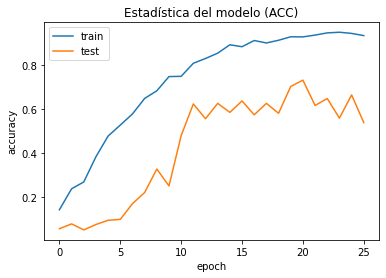

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Estadística del modelo (ACC)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

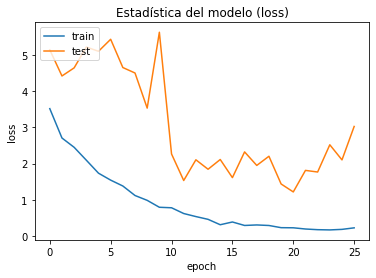

In [92]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Estadística del modelo (loss)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
'''Se evalúa la exactitud del  modelo'''
perdida, exactitud = modelo.evaluate(test_fotos, test_etiquetas)

23/23 [==============================] - 2s 66ms/step - loss: 1.2171 - accuracy: 0.7302


### Predecir valores con el modelo entrenado

In [95]:
'''Se establece la predicción del modelo'''
pred = modelo.predict(test_fotos).argmax(axis=1)

23/23 [==============================] - 2s 74ms/step


In [96]:
for i in range(50):
    print("Actual:", nombre_clases[test_etiquetas[i]])
    print("Prediction:", nombre_clases[np.array(pred[i])])
    print("-----")
    print()

Actual: Selena Rivas
Prediction: Mercy Arrobo
-----

Actual: Bryan Solorzano
Prediction: Leonardo Borja
-----

Actual: Joan Cevallos
Prediction: Kevin Paute
-----

Actual: Maria Jose Parraga
Prediction: Luis Olalla
-----

Actual: Bryan Solorzano
Prediction: Bryan Solorzano
-----

Actual: Lucy Mosquera
Prediction: Lucy Mosquera
-----

Actual: Ariel Chabla
Prediction: Kevin Paute
-----

Actual: Ariel Chabla
Prediction: Joan Cevallos
-----

Actual: Johana Salazar
Prediction: Johana Salazar
-----

Actual: Solano Wilmer
Prediction: Solano Wilmer
-----

Actual: Maria Jose Parraga
Prediction: Maria Jose Parraga
-----

Actual: Nataly Acosta
Prediction: Nataly Acosta
-----

Actual: Hector Cedenio
Prediction: Hector Cedenio
-----

Actual: Davila Raymond
Prediction: Davila Raymond
-----

Actual: Kevin Paute
Prediction: Kevin Paute
-----

Actual: Hector Cedenio
Prediction: Steven Barragan
-----

Actual: Selena Rivas
Prediction: Jordan Espinosa
-----

Actual: Ariel Chabla
Prediction: Fernando Masac

Text(156.5, 0.5, 'Clases reales')

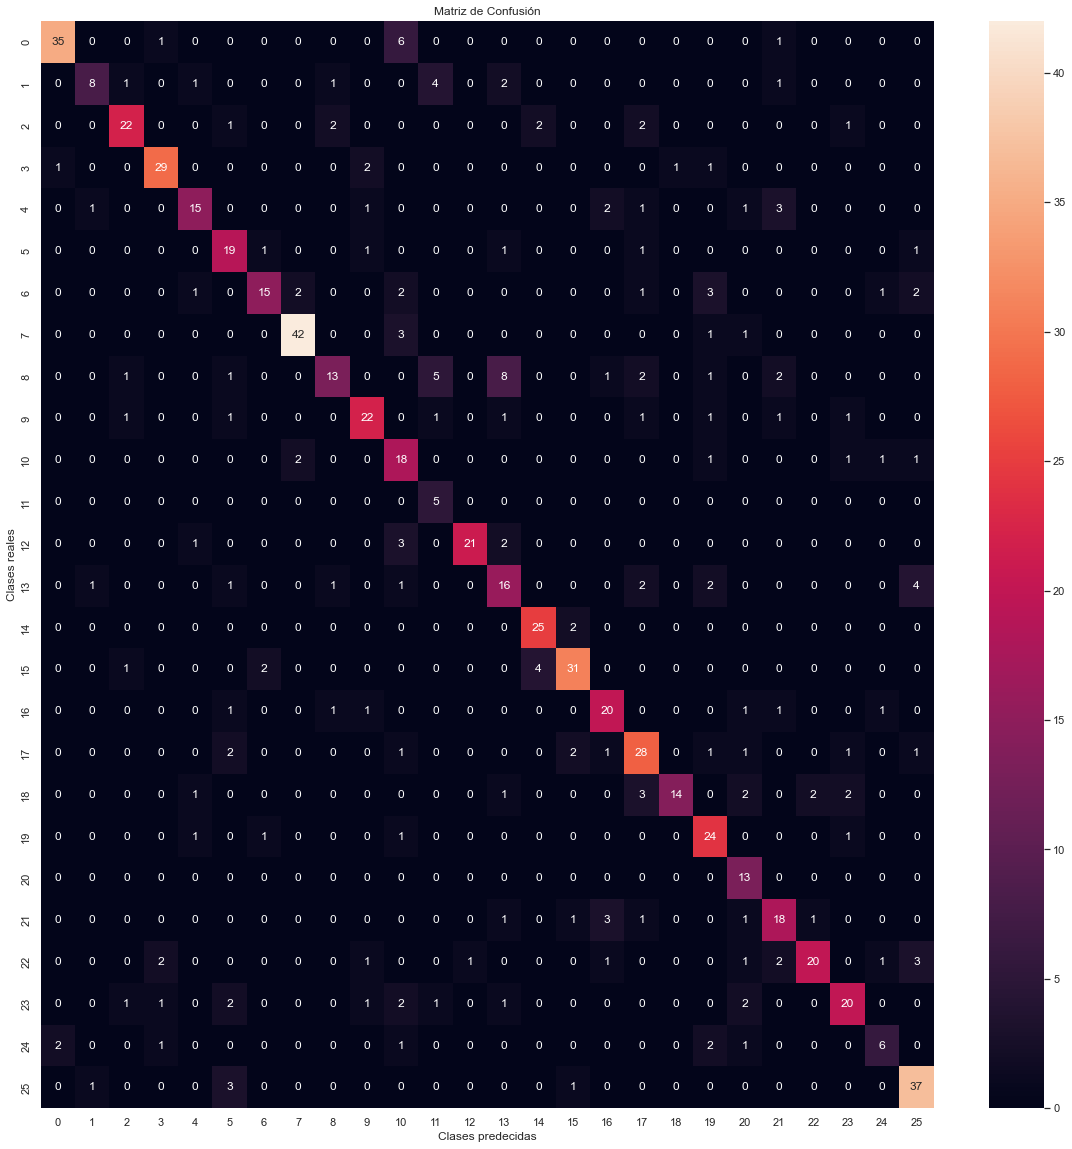

In [98]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
matrix = confusion_matrix(test_etiquetas, pred)
sns.heatmap(matrix, annot=True)
sns.set(rc = {'figure.figsize':(40,40)})
plt.title('Matriz de Confusión')
plt.xlabel('Clases predecidas')
plt.ylabel('Clases reales')

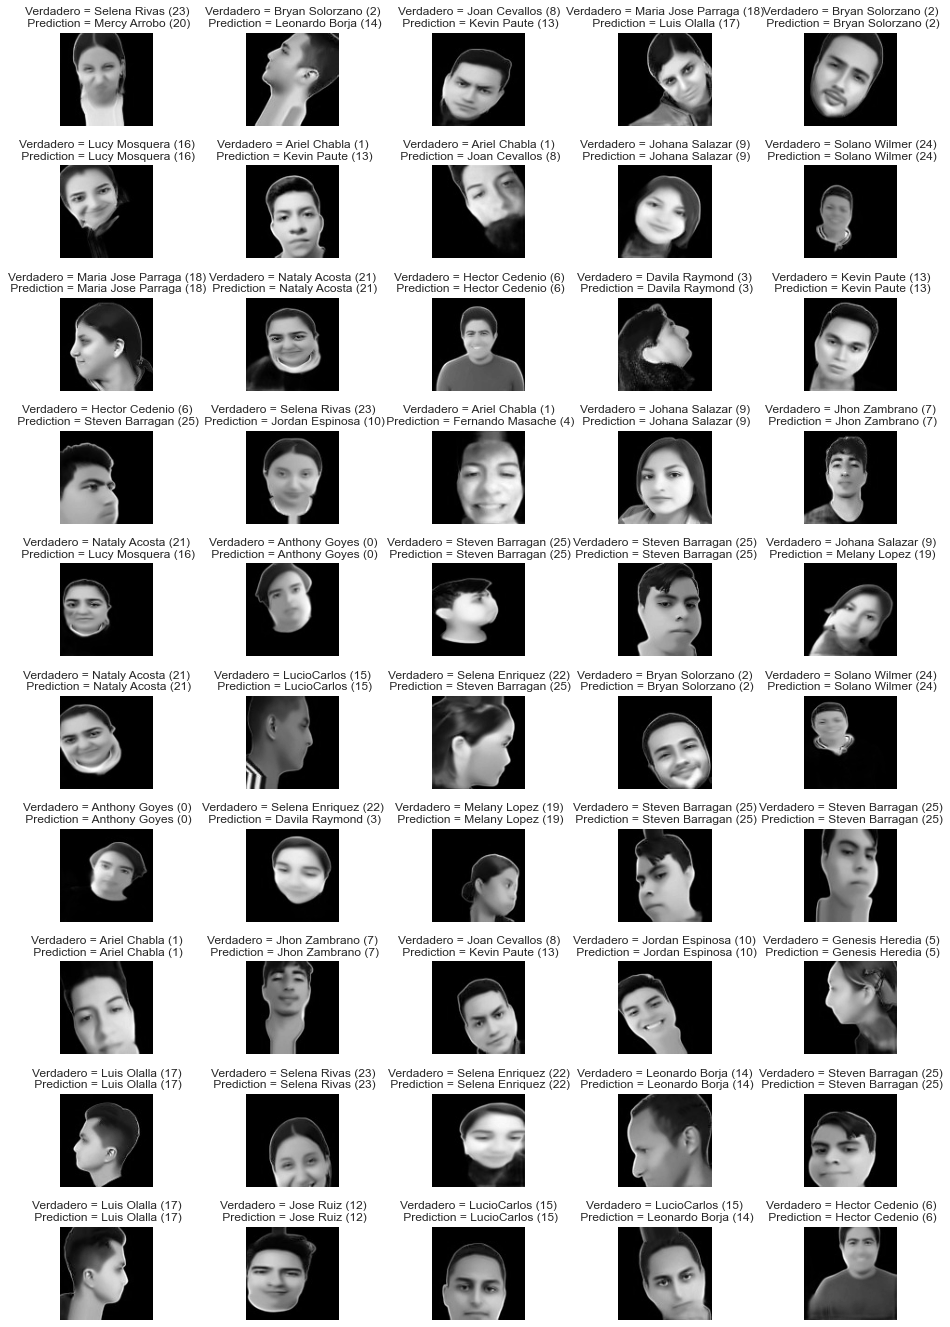

In [102]:
L = 10
W = 5

fig, axes = plt.subplots(L, W, figsize = (15, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(test_fotos[i], cmap='gray')
    axes[i].set_title('Verdadero = {} ({})\n Prediction = {} ({})'.format(nombre_clases[test_etiquetas[i]],
                    test_etiquetas[i], nombre_clases[pred[i]], pred[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [130]:
#Código que responde a la descripción anterior
def crear_modelo_cnn(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    #Instanciamos el modelo
    modeloGS=Sequential()
    modeloGS.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(100, 100, 1))) 
        
    # second series of layers: convolution, pooling, and dropout
    modeloGS.add(Conv2D(32, kernel_size=(5, 5), activation=conv_activation))  
    if pool_type == 'max':
        modeloGS.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        modeloGS.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        modeloGS.add(Dropout(rate=dropout_rate))     
    
    # third series of layers: convolution, pooling, and dropout    
    modeloGS.add(Conv2D(64, kernel_size=(3, 3), activation=conv_activation))   # 32   
    if pool_type == 'max':
        modeloGS.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        modeloGS.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        modeloGS.add(Dropout(rate=dropout_rate))     
      
    # fourth series
    modeloGS.add(Flatten())         
    modeloGS.add(Dense(64, activation='sigmoid')) # 64
    # add a dropout layer if rate is not null    
    if dropout_rate != 0:
        modeloGS.add(Dropout(rate=dropout_rate)) 
        
    modeloGS.add(Dense(26, activation='softmax'))
    
    # Compile model
    modeloGS.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return modeloGS

In [131]:
modeloGS = crear_modelo_cnn()

In [132]:
modeloGS.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 96, 96, 16)        416       
                                                                 
 conv2d_31 (Conv2D)          (None, 92, 92, 32)        12832     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 46, 46, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 46, 46, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                

In [136]:
# optimize model 
from time import time
# hyperparameter optimization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
start = time()

# create model
model = KerasClassifier(build_fn=crear_modelo_cnn, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'pool_type': ['max', 'average'],
    'conv_activation': ['sigmoid', 'tanh'],    
    'epochs': [50],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_fotos, to_categorical(train_etiquetas))

# summarize results
print('time for grid search = {:.0f} sec'.format(time()-start))
display_cv_results(grid_result)

C:\Users\Personal\AppData\Local\Temp\ipykernel_2536\955778463.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=crear_modelo_cnn, verbose=1)


KeyboardInterrupt: 

In [75]:
modelo.save('./cnnPrueba.h5')

In [184]:
!mkdir API

In [185]:
!tensorflowjs_converter --input_format keras cnn.h5 API

In [114]:
from keras.models import load_model
modelo = load_model('cnnPrueba.h5', compile = True)

In [ ]:
ruta_ejemplo = './Estudiantes_datos_aumentados/Leonardo Borja/L00393007_3.jpg'
imagen = cv2.imread(ruta_ejemplo)
imagen = np.sum(imagen/3, axis = 2, keepdims = True)
imagen = np.array(imagen)
imagen = imagen.astype(np.float32)
imagen = (imagen -  128)/128

In [ ]:
prediction = modelo.predict(imagen.reshape(1,100,100,1))

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = nombre_clases[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(imagen, cmap='gray')
plt.axis('off')
plt.title(class_name + ' ' + str(round(j*100,2)) + '%')
plt.show()